**Done by : Rahul Shah, Chadha Aouina** 

**Email : shahra@usi.ch, chadha@usi.ch**

# video pre-processing and filtering

**Created trimed video to get only reliable frames and to make process faster**

In [1]:
import cv2

def hhmmss_to_seconds(hhmmss):
    hh, mm, ss = map(int, hhmmss.split(':'))
    return hh * 3600 + mm * 60 + ss

def trim_video(input_path, output_path, start_time, end_time):
    start_seconds = hhmmss_to_seconds(start_time)
    end_seconds = hhmmss_to_seconds(end_time)

    cap = cv2.VideoCapture(input_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    start_frame = start_seconds * fps
    end_frame = end_seconds * fps

    if end_frame > total_frames:
        end_frame = total_frames

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

    current_frame = start_frame
    while cap.isOpened() and current_frame < end_frame:
        ret, frame = cap.read()
        if not ret:
            break
        out.write(frame)
        current_frame += 1

    cap.release()
    out.release()

input_video_path = '/mnt/hgfs/Desktop/WSC.mp4'
output_video_path = '/mnt/hgfs/Desktop/WSC_trimed.mp4'
start_time = '01:20:00'  # hh:mm:ss
end_time = '02:14:00'    # hh:mm:ss

# trim_video(input_video_path, output_video_path, start_time, end_time)



**Compared each frame by computing similarity which is Intersection over Union  which says i.e. Area of Intersection / Area of Union frames**

Frame 0: Similarity 0.96
Frame 1: Similarity 0.96
Frame 2: Similarity 0.96
Frame 3: Similarity 0.96
Frame 4: Similarity 0.96
Frame 5: Similarity 0.96
Frame 6: Similarity 0.96
Frame 7: Similarity 0.96
Frame 8: Similarity 0.96
Frame 9: Similarity 0.96
Frame 10: Similarity 0.96
Frame 11: Similarity 0.96
Frame 12: Similarity 0.96
Frame 13: Similarity 0.96
Frame 14: Similarity 0.96
Frame 15: Similarity 0.96
Frame 16: Similarity 0.95
Frame 17: Similarity 0.95
Frame 18: Similarity 0.95
Frame 19: Similarity 0.95
Frame 20: Similarity 0.95
Frame 21: Similarity 0.94
Frame 22: Similarity 0.94
Frame 23: Similarity 0.94
Frame 24: Similarity 0.94
Frame 25: Similarity 0.93
Frame 26: Similarity 0.93
Frame 27: Similarity 0.93
Frame 28: Similarity 0.93
Frame 29: Similarity 0.93
Frame 30: Similarity 0.92
Frame 31: Similarity 0.92
Frame 32: Similarity 0.91
Frame 33: Similarity 0.91
Frame 34: Similarity 0.90
Frame 35: Similarity 0.90
Frame 36: Similarity 0.89
Frame 37: Similarity 0.89
Frame 38: Similarity 0

[mpeg4 @ 0xaaaadcb22670] header damaged


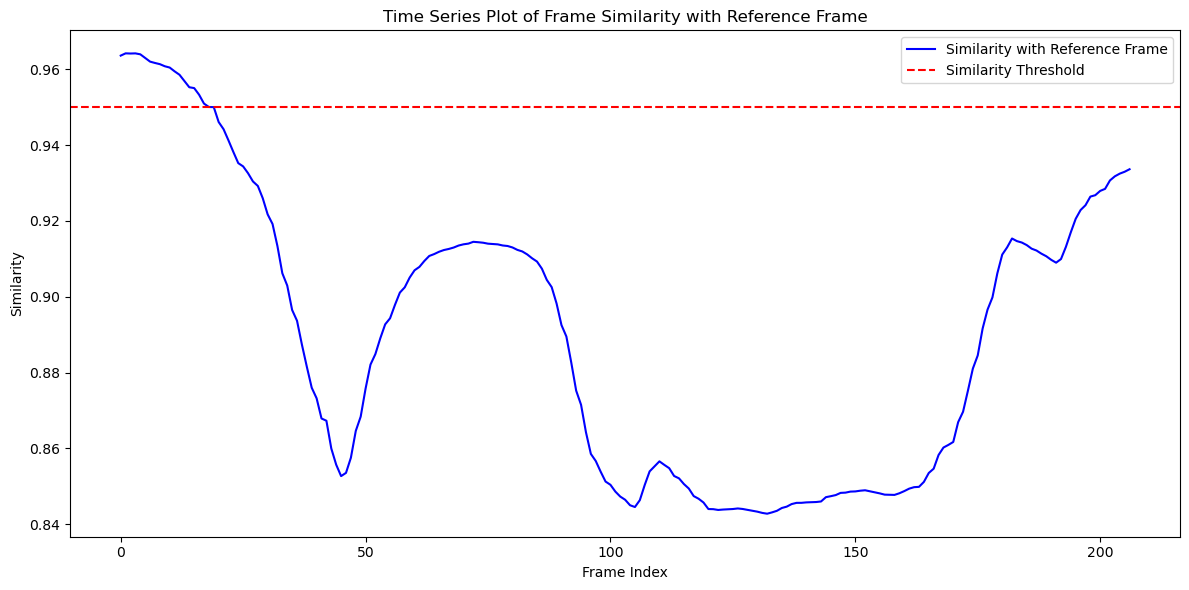

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_similarity(frame1, frame2):
    
    hsv1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
    
    lower_green = np.array([35, 100, 100]) # defining green Color range for HSV image
    upper_green = np.array([85, 255, 255])
    
    mask1 = cv2.inRange(hsv1, lower_green, upper_green)
    mask2 = cv2.inRange(hsv2, lower_green, upper_green)
    
    intersection = cv2.bitwise_and(mask1, mask2)
    
    similarity = np.sum(intersection) / (np.sum(mask1) + np.sum(mask2) - np.sum(intersection)) # computing similarity 
    
    return similarity

def plot_similarity_graph(video_path, ref_frame_path, threshold=0.95):
    cap = cv2.VideoCapture(video_path)
    ref_frame = cv2.imread(ref_frame_path)

    if ref_frame is None:
        print("Error: Could not load reference frame.")
        return

    frame_count = 0
    frame_indices = []
    similarities = []

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        similarity = compute_similarity(ref_frame, frame)
        similarities.append(similarity)
        frame_indices.append(frame_count)
        
        print(f"Frame {frame_count}: Similarity {similarity:.2f}")
        
        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

    plt.figure(figsize=(12, 6))
    plt.plot(frame_indices, similarities, label='Similarity with Reference Frame', color='blue')
    plt.axhline(y=threshold, color='red', linestyle='--', label='Similarity Threshold')
    plt.title('Time Series Plot of Frame Similarity with Reference Frame')
    plt.xlabel('Frame Index')
    plt.ylabel('Similarity')
    plt.legend()
    plt.tight_layout()
    plt.show()


video_path = '/mnt/hgfs/Desktop/WSC_trimed.mp4'
ref_frame_path = '/mnt/hgfs/Desktop/WSC sample.png'
plot_similarity_graph(video_path, ref_frame_path)


In [3]:
import cv2
import numpy as np
import os

output_path = 'frames'
if not os.path.exists(output_path):
    os.makedirs(output_path)

def compute_similarity(frame1, frame2):
    
    hsv1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    hsv2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2HSV)
    
    lower_green = np.array([35, 100, 100])
    upper_green = np.array([85, 255, 255])
    
    mask1 = cv2.inRange(hsv1, lower_green, upper_green)
    mask2 = cv2.inRange(hsv2, lower_green, upper_green)
    
    intersection = cv2.bitwise_and(mask1, mask2) # intersection of the two masks
    
    similarity = np.sum(intersection) / (np.sum(mask1) + np.sum(mask2) - np.sum(intersection)) #  Similarity as the ratio of intersection to the union of the masks
    
    return similarity

def side_view_frames(video_path, ref_frame_path, threshold=0.95, output_path='frames'):
    cap = cv2.VideoCapture(video_path)
    ref_frame = cv2.imread(ref_frame_path)

    if ref_frame is None:
        print("Error: Could not load reference frame.")
        return

    frame_count = 0

    if not cap.isOpened():
        print("Error: Could not open video.")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        similarity = compute_similarity(ref_frame, frame)
        if similarity >= threshold:
            frame_path = f"{output_path}/frame_{frame_count:04d}_{similarity:.2f}.jpg"
            cv2.imwrite(frame_path, frame)
            cv2.rectangle(frame, (10, 10), (110, 50), (0, 255, 0), -1)
            cv2.putText(frame, "Saved", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)
        else:
            cv2.rectangle(frame, (10, 10), (210, 50), (0, 0, 255), -1)
            cv2.putText(frame, "Not Saved", (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        frame_count += 1
        cv2.imshow('Frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    print(f"Total frames: {frame_count}")

# Usage
video_path = '/mnt/hgfs/Desktop/WSC.mp4'
ref_frame_path = '/mnt/hgfs/Desktop/WSC sample.png'
#side_view_frames(video_path, ref_frame_path) Total frames: 367878


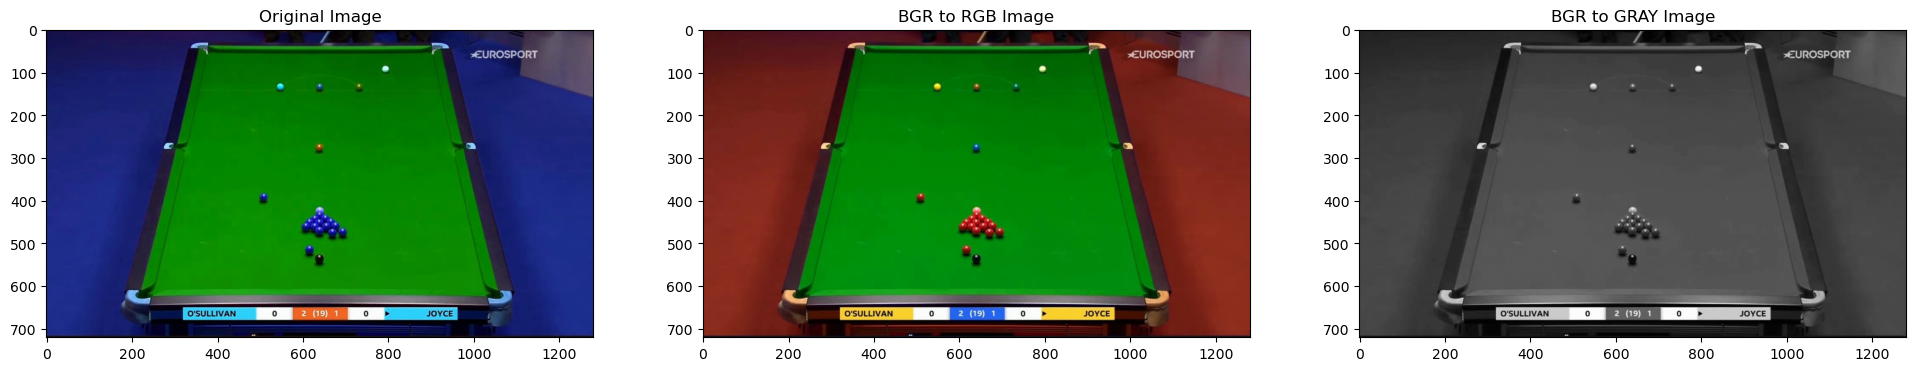

In [4]:
from matplotlib import pyplot as plt

image_path = "/mnt/hgfs/Desktop/frames/frame_20625_0.99.jpg"
image = cv2.imread(image_path)

# Convert to grayscale
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(24,24))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(image)
plt.subplot(1,3,2)
plt.title("BGR to RGB Image")
plt.imshow(RGB_image)
plt.subplot(1,3,3)
plt.title("BGR to GRAY Image")
plt.imshow(gray_image,cmap='gray')
plt.show()

**Understanding of sobel function**

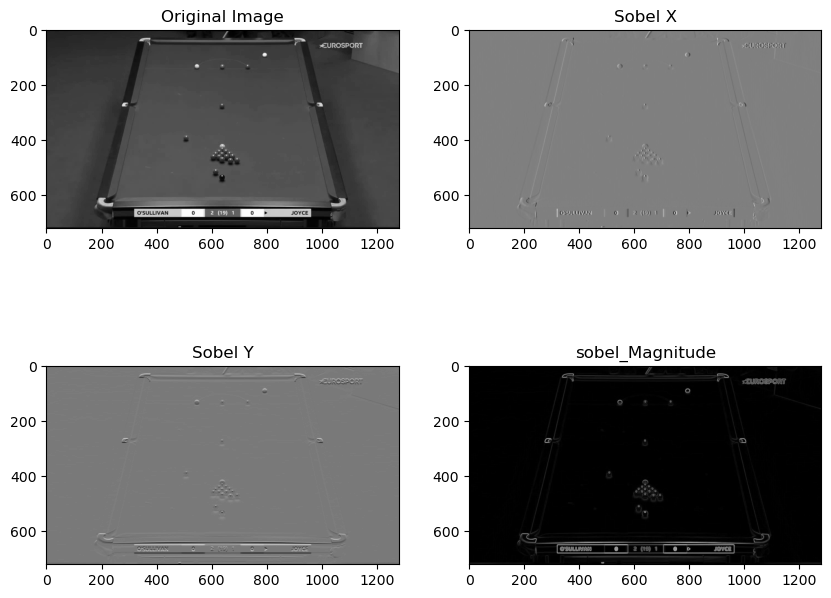

In [5]:
def PAC(img):

    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)

    sobel_mag = np.sqrt(sobelx**2 + sobely**2) 
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX)

    return sobel_mag,sobelx,sobely,img

sobel_mag,sobelx,sobely,img = PAC(gray_image)
sobel_mag,sobelx,sobely,img

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(2, 2, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X')
plt.subplot(2, 2, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y')
plt.subplot(2, 2, 4)
plt.imshow(sobel_mag, cmap='gray')
plt.title('sobel_Magnitude')
plt.show()

In [6]:
height, width = sobel_mag.shape
print(f"height:{height},width:{width}")

height:720,width:1280


# Finding corners (Co-ords)

**Using the hough transform we have defined the corners using sobel gradiants**


Detected lines (rho, theta):
rho: -886, theta in degrees: 167.0
rho: 37, theta in degrees: 90.0
rho: 40, theta in degrees: 90.0
rho: 356, theta in degrees: 13.0
rho: 361, theta in degrees: 14.0
rho: 606, theta in degrees: 90.0
rho: 620, theta in degrees: 90.0
rho: 637, theta in degrees: 90.0
rho: 643, theta in degrees: 90.0
rho: 648, theta in degrees: 90.0
rho: 651, theta in degrees: 90.0
rho: 652, theta in degrees: 90.0
rho: 677, theta in degrees: 90.0
rho: 681, theta in degrees: 90.0
rho: 690, theta in degrees: 90.0
rho: 715, theta in degrees: 90.0
Detected corners (intersections):
x: 356, y: 36
x: 356, y: 39
x: 362, y: 36
x: 362, y: 39


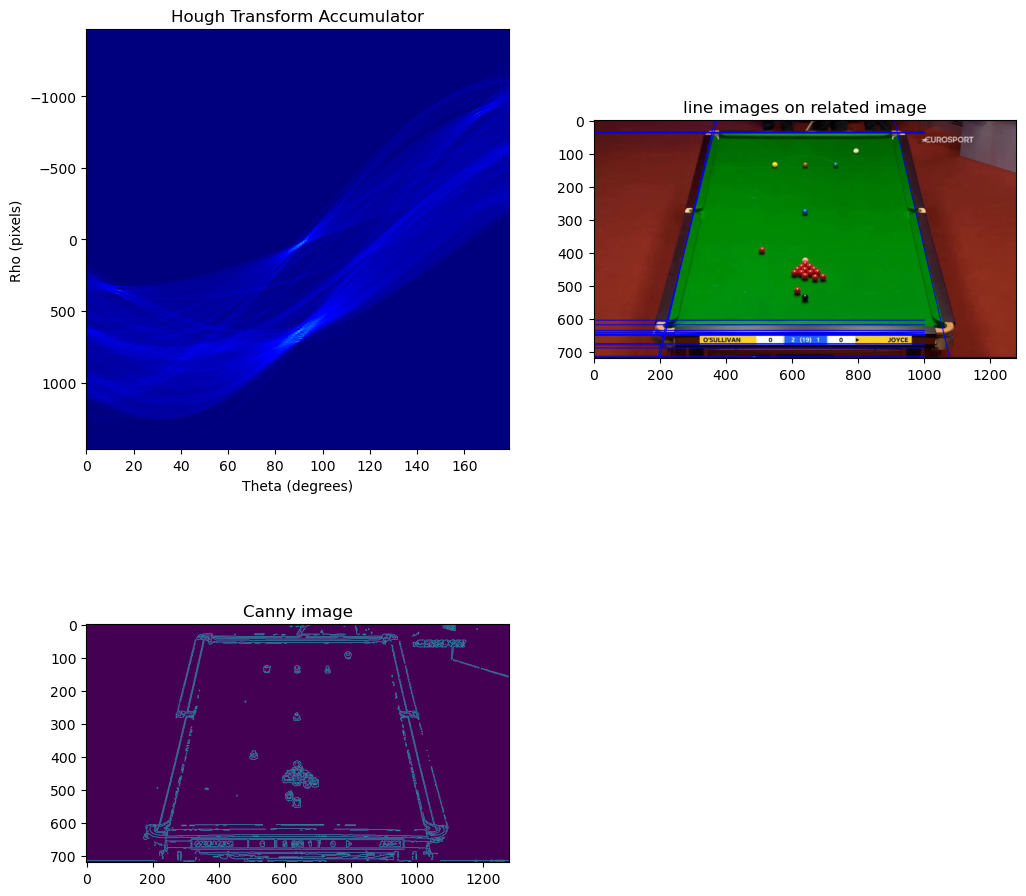

In [7]:
def hough_transform(edges, rho_res=1, theta_res=np.pi/180, threshold=280):
    height, width = edges.shape
    max_dist = int(np.sqrt(height**2 + width**2))
    rhos = np.arange(-max_dist, max_dist, rho_res)
    thetas = np.arange(0, np.pi, theta_res)
    accumulator = np.zeros((len(rhos), len(thetas)), dtype=np.int32)
    edge_points = np.argwhere(edges)
    
    for y, x in edge_points:
        for theta_idx in range(len(thetas)):
            theta = thetas[theta_idx]
            rho = int(x * np.cos(theta) + y * np.sin(theta) + max_dist)
            accumulator[rho, theta_idx] += 1

    
    lines = []
    for rho_idx in range(accumulator.shape[0]):
        for theta_idx in range(accumulator.shape[1]):
            if accumulator[rho_idx, theta_idx] >= threshold:
                rho = rhos[rho_idx]
                theta = thetas[theta_idx]
                lines.append((rho, theta))

    return lines,accumulator,rhos,thetas

def draw_lines(image, lines):
    line_img = np.copy(image)
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(line_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return line_img

def compute_intersections(lines):
    intersections = []
    for i in range(len(lines)):
        for j in range(i + 1, len(lines)):
            rho1, theta1 = lines[i]
            rho2, theta2 = lines[j]
            a1, b1 = np.cos(theta1), np.sin(theta1)
            a2, b2 = np.cos(theta2), np.sin(theta2)
            determinant = a1 * b2 - a2 * b1
            if determinant != 0:
                x = (b2 * rho1 - b1 * rho2) / determinant
                y = (a1 * rho2 - a2 * rho1) / determinant
                intersections.append((int(x), int(y)))
    return intersections

def filter_and_sort_intersections(intersections, image_shape):
    height, width = image_shape[:2]
    valid_intersections = []

    for point in intersections:
        x, y = point
        if 0 <= x < width and 0 <= y < height: # Check if the point is within the image boundaries
            valid_intersections.append(point)

    def distance_from_origin(point):
        x, y = point
        return x**2 + y**2

    valid_intersections.sort(key=distance_from_origin)  # Sort the valid intersections by their distance from the top-left corner(0,0)
    return valid_intersections

image = cv2.imread('/mnt/hgfs/Desktop/frames/frame_20625_0.99.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_mag = np.sqrt(sobelx**2 + sobely**2)
sobel_mag = cv2.convertScaleAbs(sobel_mag)

_, threshold = cv2.threshold(sobel_mag, 50, 255, cv2.THRESH_BINARY)
threshold = np.uint8(threshold)
edges = cv2.Canny(threshold, 50, 150, apertureSize=3)

lines,accumulator,rhos,thetas = hough_transform(edges)
intersections = compute_intersections(lines)
valid_intersections = filter_and_sort_intersections(intersections, image.shape)

line_img = draw_lines(image, lines) # Draw lines and intersections on the image

for (x, y) in valid_intersections:
    cv2.circle(line_img, (x, y), 5, (0, 255, 0), -1)

# Select the four corners
if len(valid_intersections) >= 4:
    corners = valid_intersections[:4]
else:
    corners = valid_intersections

line_img = draw_lines(image, lines)

print("Detected lines (rho, theta):")
for line in lines:
    print(f"rho: {line[0]}, theta in degrees: {np.rad2deg(line[1])}")

print("Detected corners (intersections):")
for (x, y) in corners:
    print(f"x: {x}, y: {y}")

plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.imshow(accumulator, cmap='jet',aspect='auto', extent=[np.rad2deg(thetas[0]), np.rad2deg(thetas[-1]), rhos[-1], rhos[0]])
plt.title('Hough Transform Accumulator')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (pixels)')
plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("line images on related image")
plt.subplot(2,2,3)
plt.imshow(edges)
plt.title('Canny image')
plt.show()


# Finding spots (Co-ords)

In [9]:
color_ranges = {
    'yellow': ([20, 100, 100], [30, 255, 255]),
    'green': ([35, 100, 100], [85, 255, 255]),
    'brown': ([10, 100, 20], [20, 255, 200]),
    'blue': ([100, 150, 0], [140, 255, 255]),
    'pink': ([160, 70, 70], [180, 255, 255]),
    'black': ([0, 0, 0], [180, 255, 50])
}

''' The find_spot_coordinates function isolates and identifies the location of a colored spot in an image using color segmentation, contour detection, and centroid calculation. 
By converting the image to HSV, applying a color mask, and finding the largest contour, it effectively determines the coordinates of the spot's center.'''

def find_spot_coordinates(image, lower_hsv, upper_hsv):
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = np.array(lower_hsv, dtype="uint8")
    upper = np.array(upper_hsv, dtype="uint8")
    mask = cv2.inRange(hsv, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)

    '''This  part of code  computes the centroid of the largest contour detected in an image'''

    gray_output = cv2.cvtColor(output, cv2.COLOR_RGB2GRAY)
    contours, _ = cv2.findContours(gray_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea) # Get the largest contour which we assume is the spot
        M = cv2.moments(largest_contour)
        if M["m00"] != 0:
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            return (cX, cY)
    return None

image_path = '/mnt/hgfs/Desktop/frames/frame_20625_0.99.jpg' 
image = cv2.imread(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a copy of the image to draw spots
output_image = np.copy(rgb_image)

# Find and draw each spot
detected_coordinates = {} # Dict all the coordinates of ball 
for color, (lower, upper) in color_ranges.items():
    coordinates = find_spot_coordinates(rgb_image, lower, upper)
    if coordinates:
        detected_coordinates[color] = coordinates


baulk_line_y = np.mean([detected_coordinates['yellow'][1], detected_coordinates['green'][1], detected_coordinates['brown'][1]])
ball_radius_y_offsets = {color: detected_coordinates[color][1] - baulk_line_y for color in ['yellow', 'green', 'brown']}
avg_radius_y_offset = np.mean(list(ball_radius_y_offsets.values()))

spots_coordinates = {color: (detected_coordinates[color][0], detected_coordinates[color][1] - avg_radius_y_offset) for color in detected_coordinates}

for color, coordinates in spots_coordinates.items():
    spots_coordinates[color] = (int(coordinates[0]), int(coordinates[1]))


print(f"spots coordinates of YGBBPB are {spots_coordinates}")

spots coordinates of YGBBPB are {'yellow': (405, 664), 'green': (638, 359), 'brown': (1056, 664), 'blue': (659, 663), 'pink': (228, 31), 'black': (637, 700)}


# Finding Camera matrix P 

**Evaluation of DLT algorithm using World points and image_points (i.e. 6-spots and 4-corners coordinates) . Where World points are calculated manually as in 3D coordinates as we have Found in the code above**

In [27]:
import  time 

def DLT_1(world_points, image_points):
    num_points = world_points.shape[0]
    A = []

    for i in range(num_points):
        X, Y, Z = world_points[i]
        u, v = image_points[i]

        A.append([-X, -Y, -Z, -1, 0, 0, 0, 0, u * X, u * Y, u * Z, u])
        A.append([ 0,  0,  0,  0,-X, -Y, -Z, -1, v * X, v * Y, v * Z, v])

    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape(3, 4)

    return P

def decompose_camera_matrix(P):
    M = P[:, :3]
    p4 = P[:, 3]

    K, R = np.linalg.qr(np.linalg.inv(M))
    K = np.linalg.inv(K)

    T = np.linalg.inv(K).dot(p4)
    C = -R.T.dot(T)

    return K, R, C

def main_DLT_1():

    world_coords = {'yellow': [0.292, 3.277, 0],'green': [0.292, 0.292, 0],'brown': [0.292, 1.778, 0],'blue': [1.778, 1.778, 0],'pink': [2.565, 1.778, 0],'black': [3.261, 1.778, 0],'corner_top_left': [0, 0, 0],'corner_top_right': [3.569, 0, 0],'corner_bottom_left': [0, 3.569, 0],'corner_bottom_right': [3.569, 3.569, 0]}
    spots_coordinates = {'yellow': [405, 664],'green': [638, 359],'brown': [1056, 664],'blue': [659, 663],'pink': [228, 31],'black': [637, 700],'corner_top_left': [356, 36],'corner_top_right': [356, 39],'corner_bottom_left': [362, 36],'corner_bottom_right': [362, 39]}

    detected_colors = list(spots_coordinates.keys())
    world_coords = {color: world_coords[color] for color in detected_colors}

    image_points = np.array([spots_coordinates[color] for color in detected_colors])
    world_points = np.array([world_coords[color] for color in detected_colors])

     
    start_time = time.time()
    P = DLT_1(world_points, image_points) # Compute the camera matrix P
    end_time = time.time()
    dlt_1_time = end_time - start_time

    print(f"Detected colours nad corners are {detected_colors}")
    print("Estimated camera matrix P:")
    print(P)

    # Decompose P -->  K, R, and C
    K, R, C = decompose_camera_matrix(P)
    print("Intrinsic matrix K:")
    print(K)
    print("Rotation matrix R:")
    print(R)
    print("Camera center C:")
    print(C)
    print(f"Time for computation for DLT-1 is {dlt_1_time}")

# Usage
main_DLT_1()


Detected colours nad corners are ['yellow', 'green', 'brown', 'blue', 'pink', 'black', 'corner_top_left', 'corner_top_right', 'corner_bottom_left', 'corner_bottom_right']
Estimated camera matrix P:
[[ 0.00000000e+00  4.22991165e-31 -1.93792587e-17 -1.16742201e-30]
 [ 1.42940273e-31  7.32570853e-32 -2.21197312e-16 -6.29755845e-31]
 [ 1.93875249e-34  6.00343810e-34  1.00000000e+00 -2.53042827e-33]]
Intrinsic matrix K:
[[-4.56091754e-01  8.89932757e-01 -4.45840720e-34]
 [-8.89932757e-01 -4.56091754e-01  4.46347796e-34]
 [ 1.93875249e-34  6.00343810e-34  1.00000000e+00]]
Rotation matrix R:
[[ 2.65651034e+30 -3.19078552e+30 -6.54311980e+14]
 [ 0.00000000e+00 -6.22590637e+30 -1.37715375e+15]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Camera center C:
[-2.90327865e+00 -1.19283411e+00 -3.20115087e-16]
Time for computation for DLT-1 is 0.0011603832244873047


**Evaluation of DLT algorithm using World points and image_points (i.e. 6-spots and 4-corners coordinates) . Where World points are calculated manually as in 3D coordinates which were already given**

In [28]:
def DLT_2(world_points, image_points):
    num_points = world_points.shape[0]
    A = []

    for i in range(num_points):
        X, Y, Z = world_points[i]
        u, v = image_points[i]

        A.append([-X, -Y, -Z, -1, 0, 0, 0, 0, u * X, u * Y, u * Z, u])
        A.append([ 0,  0,  0,  0,-X, -Y, -Z, -1, v * X, v * Y, v * Z, v])

    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    P = V[-1].reshape(3, 4)

    return P

def decompose_camera_matrix(P):
    M = P[:, :3]
    p4 = P[:, 3]

    K, R = np.linalg.qr(np.linalg.inv(M))
    K = np.linalg.inv(K)

    T = np.linalg.inv(K).dot(p4)
    C = -R.T.dot(T)

    return K, R, C

def main_DLT_2():
    # Predefined correspondences for DLT
    world_points = np.array([
        [-0.889, -1.7845, 0.03], [0.889, -1.7845, 0.03], 
        [0.889, 1.7845, 0.03], [-0.889, 1.7845, 0.03], 
        [-0.292, 1.0475, 0], [0.292, 1.0475, 0], 
        [0, 1.0475, 0], [0, 0, 0], 
        [0, -0.89225, 0], [0, -1.4605, 0]
    ])

    image_points = np.array([
        [253, 608], [1027, 608], 
        [904, 47], [376, 47], 
        [548, 143], [732, 143], 
        [640, 143], [640, 287], 
        [640, 437], [640, 549]
    ])

    start_time = time.time()
    P = DLT_2(world_points, image_points) # Compute the camera matrix P
    end_time = time.time()
    dlt_2_time = end_time - start_time

    
    print("Estimated camera matrix P:")
    print(P)

    # Decompose P --> K, R, and C
    K, R, C = decompose_camera_matrix(P)
    print("Intrinsic matrix K:")
    print(K)
    print("Rotation matrix R:")
    print(R)
    print("Camera center C:")
    print(C)
    print(f"Time for computation for DLT-2 is {dlt_2_time}")

if __name__ == "__main__":
    main_DLT_2()


Estimated camera matrix P:
[[ 3.80693501e-01  7.30675269e-02 -1.17515453e-01  6.93739161e-01]
 [-9.74254019e-07 -1.32181530e-01 -4.90514307e-01  3.10760723e-01]
 [-3.06314256e-09  1.14167966e-04 -1.83486607e-04  1.08396634e-03]]
Intrinsic matrix K:
[[-1.00000000e+00 -1.64944231e-05  6.43102973e-06]
 [ 1.06072560e-05 -8.49059671e-01 -5.28296958e-01]
 [ 1.41742815e-05 -5.28296957e-01  8.49059671e-01]]
Rotation matrix R:
[[-2.62677153e+00  3.42373320e-04  1.68138635e+03]
 [ 0.00000000e+00  2.69275246e+00 -4.31931607e+03]
 [ 0.00000000e+00  0.00000000e+00 -4.62736593e+03]]
Camera center C:
[-1.82228558e+00  7.12304927e-01 -7.31168923e+02]
Time for computation for DLT-2 is 0.0004398822784423828


# Wrapping image 

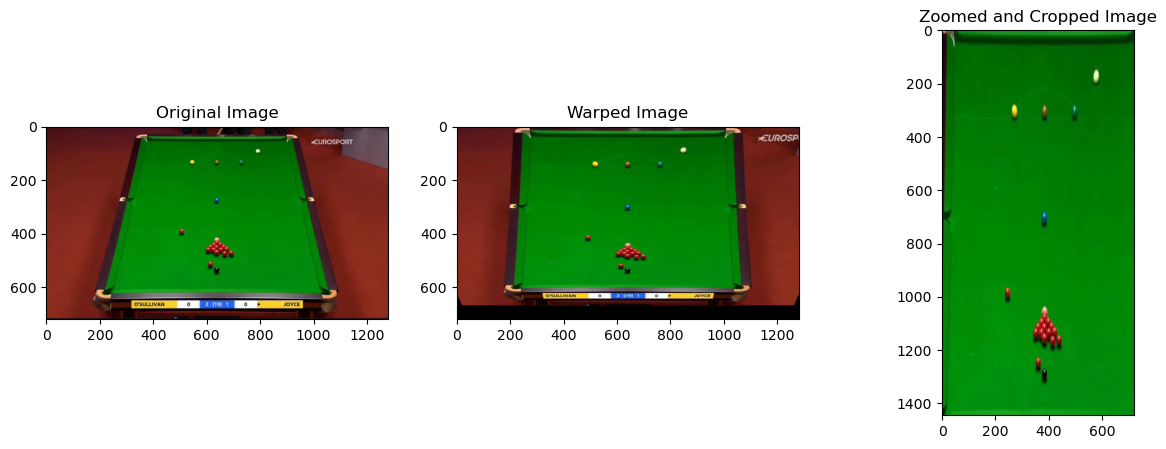

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

uv = np.array([[253, 608], [1027, 608], [904,  47], [376,  47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]]) # Given 2D correspondences
uv_projected = np.array([[253, 608], [1027, 608], [1027, 47], [253, 47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]]) # Defining the target coordinates (for perpendicular view)

H, _ = cv2.findHomography(uv, uv_projected) # Homography matrix

# Load the image
image_path = "/mnt/hgfs/Desktop/frames/frame_20625_0.99.jpg"
image = cv2.imread(image_path)

warped_image = cv2.warpPerspective(image, H, (image.shape[1], image.shape[0])) # The homography matrix is used here for wrapping of image

x_start, x_end = 225, 1000
y_start, y_end = 20, 600
cropped_warped_image = warped_image[y_start:y_end, x_start:x_end] # Crop the image from x=225 to x=1000 and y=20 to y=600


zoomed_image = cv2.resize(cropped_warped_image, (720, 1445), interpolation=cv2.INTER_LINEAR) # Resizing wrapped image


output_path = "/mnt/hgfs/Desktop/WSC_sample_zoomed.png"
cv2.imwrite(output_path, zoomed_image)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.title("Warped Image")
plt.imshow(cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.title("Zoomed and Cropped Image")
plt.imshow(cv2.cvtColor(zoomed_image, cv2.COLOR_BGR2RGB))

plt.show()


zoomed_image_saved = cv2.imread(output_path)



# Ball positions reconstruction

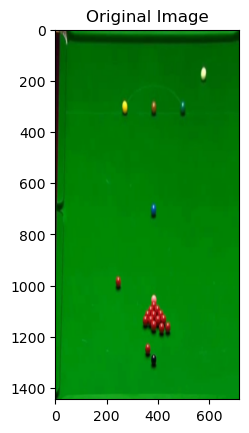

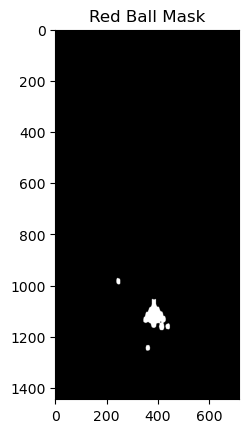

Red balls detected: [(360, 1244, 11), (439, 1160, 11), (399, 1114, 63), (245, 984, 12)]


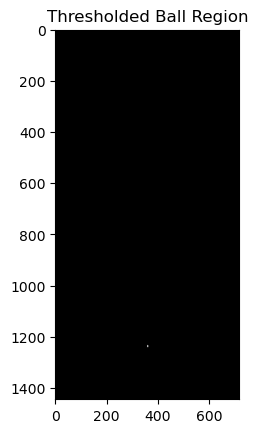

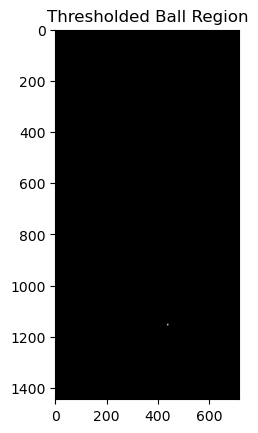

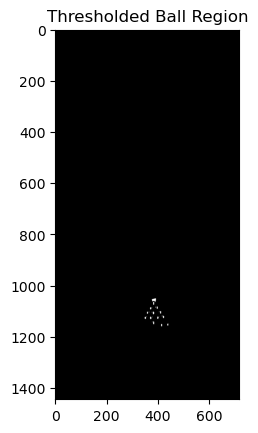

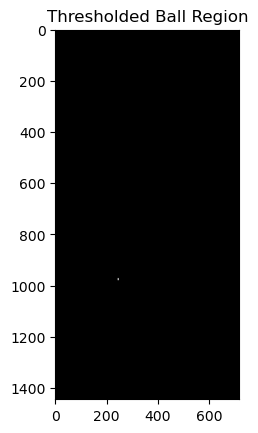

Highlights detected: [(360, 1237), (438, 1153), (414, 1156), (438, 1153), (383, 1147), (351, 1127), (399, 1126), (371, 1127), (421, 1124), (416, 1120), (382, 1108), (365, 1104), (359, 1107), (410, 1106), (372, 1090), (397, 1087), (391, 1085), (383, 1070), (385, 1057), (245, 976)]


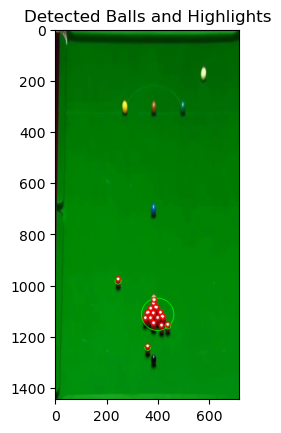

Reconstructed Ball Positions: [(360, 1237), (438, 1153), (414, 1156), (438, 1153), (383, 1147), (351, 1127), (399, 1126), (371, 1127), (421, 1124), (416, 1120), (382, 1108), (365, 1104), (359, 1107), (410, 1106), (372, 1090), (397, 1087), (391, 1085), (383, 1070), (385, 1057), (245, 976)]


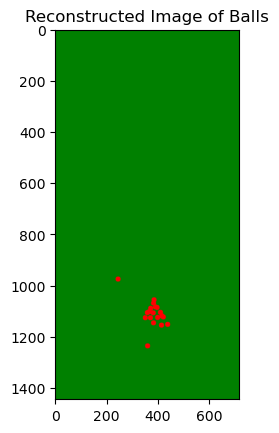

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def find_red_balls(image):
    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the range for red color in HSV space
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    mask = cv2.bitwise_or(mask1, mask2) # Combining both masks

    # Applying morphological operations to remove noise and fill gaps
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    plt.figure()
    plt.imshow(mask, cmap='gray')
    plt.title('Red Ball Mask')
    plt.show()

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    balls = []
    for contour in contours:
        # Get the minimum enclosing circle and filter out small circles that are not likely to be balls
        ((x, y), radius) = cv2.minEnclosingCircle(contour)

        if radius > 5:  
            balls.append((int(x), int(y), int(radius)))

    return balls

def find_highlights(image, balls):
    highlights = []
    for (x, y, radius) in balls:
        
        mask = np.zeros(image.shape[:2], dtype="uint8") # Create a mask for the ball region
        cv2.circle(mask, (x, y), radius, 255, -1)

        ball_region = cv2.bitwise_and(image, image, mask=mask)
        hsv_ball_region = cv2.cvtColor(ball_region, cv2.COLOR_BGR2HSV)

        _, thresh = cv2.threshold(hsv_ball_region[:,:,2], 220, 255, cv2.THRESH_BINARY)

        plt.figure()
        plt.imshow(thresh, cmap='gray')
        plt.title('Thresholded Ball Region')
        plt.show()

        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Finding contours of the white regions

        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                highlights.append((cX, cY))

    return highlights

# Parameters for reconstruction of balls positions
l_z = 5.5  # Average height of the lights
c_z = 1.5  # Estimated height of the camera
c_x = 0    # Assuming camera is centered horizontally
c_y = 0    # Assuming camera is centered vertically

def reconstruct_ball_position(highlight_positions, l_z, c_x, c_y, c_z):
    ball_positions = []
    for pos in highlight_positions:
        x, y = pos
        b_x = x  # Approximate the ball's x position as the highlight's x position
        b_y = y  # Approximate the ball's y position as the highlight's y position
        ball_positions.append((b_x, b_y))
    return ball_positions

def reconstruct_image(ball_positions, image_size):
    reconstructed_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    reconstructed_image[:] = (0, 128, 0)  # Set the background to green
    for (x, y) in ball_positions:
        cv2.circle(reconstructed_image, (x, y), 10, (0, 0, 255), -1)  # Draw red balls
    return reconstructed_image

image_path = '/mnt/hgfs/Desktop/WSC_sample_zoomed.png'
if not os.path.exists(image_path):
    print(f"Error: The file at {image_path} does not exist.")
else:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Failed to load the image at {image_path}.")
    else:
        plt.figure()
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.show()

        balls = find_red_balls(image)
        if not balls:
            print("No red balls detected.")
        else:
            print("Red balls detected:", balls)

            # Detect the highlights within the red balls
            highlights = find_highlights(image, balls)
            if not highlights:
                print("No highlights detected.")
            else:
                print("Highlights detected:", highlights)

                # Encountring the detected balls and highlights
                for (x, y, radius) in balls:
                    cv2.circle(image, (x, y), radius, (0, 255, 0), 2)

                for (hx, hy) in highlights:
                    cv2.circle(image, (hx, hy), 5, (255, 255, 255), -1)
                    cv2.circle(image, (hx, hy), 10, (0, 0, 255), 2)  # Circle the highlight with a larger circle for visibility

                plt.figure()
                plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                plt.title('Detected Balls and Highlights')
                plt.show()

                ball_positions = reconstruct_ball_position(highlights, l_z, c_x, c_y, c_z) # re-contructing the ball positions
                print("Reconstructed Ball Positions:", ball_positions)

                image_size = image.shape[:2]
                reconstructed_image = reconstruct_image(ball_positions, image_size) # re-constructing the image from previously identified ball positions

                plt.figure()
                plt.imshow(cv2.cvtColor(reconstructed_image, cv2.COLOR_BGR2RGB))
                plt.title('Reconstructed Image of Balls')
                plt.show()


In [6]:
''''Here we are going to apply all previous methods on the filtered video'''

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

uv = np.array([[253, 608], [1027, 608], [904,  47], [376,  47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])
uv_projected = np.array([[253, 608], [1027, 608], [1027, 47], [253, 47], [548, 143], [732, 143], [640, 143], [640, 287], [640, 437], [640, 549]])

H, _ = cv2.findHomography(uv, uv_projected)

l_z = 5.5  
c_z = 1.5  
c_x = 0    
c_y = 0    

def find_red_balls(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0, 100, 100])
    upper_red1 = np.array([10, 255, 255])
    lower_red2 = np.array([160, 100, 100])
    upper_red2 = np.array([180, 255, 255])
    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)
    mask = cv2.bitwise_or(mask1, mask2)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    balls = []
    for contour in contours:
        ((x, y), radius) = cv2.minEnclosingCircle(contour)
        if radius > 5:
            balls.append((int(x), int(y), int(radius)))
    return balls

def find_highlights(image, balls):
    highlights = []
    for (x, y, radius) in balls:
        mask = np.zeros(image.shape[:2], dtype="uint8")
        cv2.circle(mask, (x, y), radius, 255, -1)
        ball_region = cv2.bitwise_and(image, image, mask=mask)
        hsv_ball_region = cv2.cvtColor(ball_region, cv2.COLOR_BGR2HSV)
        _, thresh = cv2.threshold(hsv_ball_region[:,:,2], 220, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for contour in contours:
            M = cv2.moments(contour)
            if M["m00"] != 0:
                cX = int(M["m10"] / M["m00"])
                cY = int(M["m01"] / M["m00"])
                highlights.append((cX, cY))
    return highlights

def reconstruct_ball_position(highlight_positions, l_z, c_x, c_y, c_z):
    ball_positions = []
    for pos in highlight_positions:
        x, y = pos
        b_x = x
        b_y = y
        ball_positions.append((b_x, b_y))
    return ball_positions

def reconstruct_image(ball_positions, image_size):
    reconstructed_image = np.zeros((image_size[0], image_size[1], 3), dtype=np.uint8)
    reconstructed_image[:] = (0, 128, 0)
    for (x, y) in ball_positions:
        cv2.circle(reconstructed_image, (x, y), 10, (0, 0, 255), -1)
    return reconstructed_image

video_path = '/mnt/hgfs/Desktop/WSC_trimed.mp4'
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('/mnt/hgfs/Desktop/WSC_processed.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (720, 1445))

frame_count = 0  # Initalization

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1  # Increment frame counter

    warped_frame = cv2.warpPerspective(frame, H, (frame.shape[1], frame.shape[0]))
    x_start, x_end = 225, 1000
    y_start, y_end = 20, 600
    cropped_warped_frame = warped_frame[y_start:y_end, x_start:x_end]
    zoomed_frame = cv2.resize(cropped_warped_frame, (720, 1445), interpolation=cv2.INTER_LINEAR)

    balls = find_red_balls(zoomed_frame)
    if balls:
        highlights = find_highlights(zoomed_frame, balls)
        if highlights:
            ball_positions = reconstruct_ball_position(highlights, l_z, c_x, c_y, c_z)
            image_size = zoomed_frame.shape[:2]
            reconstructed_image = reconstruct_image(ball_positions, image_size)
            out.write(reconstructed_image)

    print(f"Processing frame: {frame_count}")

cap.release()
out.release()
print(f"Processing complete. The output video is saved as /content/WSC_processed.mp4. Total frames processed: {frame_count}")


Processing frame: 1
Processing frame: 2
Processing frame: 3
Processing frame: 4
Processing frame: 5
Processing frame: 6
Processing frame: 7
Processing frame: 8
Processing frame: 9
Processing frame: 10
Processing frame: 11
Processing frame: 12
Processing frame: 13
Processing frame: 14
Processing frame: 15
Processing frame: 16
Processing frame: 17
Processing frame: 18
Processing frame: 19
Processing frame: 20
Processing frame: 21
Processing frame: 22
Processing frame: 23
Processing frame: 24
Processing frame: 25
Processing frame: 26
Processing frame: 27
Processing frame: 28
Processing frame: 29
Processing frame: 30
Processing frame: 31
Processing frame: 32
Processing frame: 33
Processing frame: 34
Processing frame: 35
Processing frame: 36
Processing frame: 37
Processing frame: 38
Processing frame: 39
Processing frame: 40
Processing frame: 41
Processing frame: 42
Processing frame: 43
Processing frame: 44
Processing frame: 45
Processing frame: 46
Processing frame: 47
Processing frame: 48
P

[mpeg4 @ 0xaaab15c03b30] header damaged
